# Cryptocurrency Market Exploratory Data Analysis

### Data is pulled from the Poloniex Exchange

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
%matplotlib inline

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [4]:
def CryptoData(symbol, frequency):
    #Parameters: String symbol, int frequency = 300,900,1800,7200,14400,86400
    #Returns: df from first available date
    url ='https://poloniex.com/public?command=returnChartData&currencyPair='+symbol+'&end=9999999999&period='+str(frequency)+'&start=0'
    df = pd.read_json(url)
    df.set_index('date',inplace=True)
    return df

In [5]:
df = CryptoData(symbol = 'USDT_BTC', frequency = 86400)['close']
df.tail(5)

date
2018-01-17    11036.115325
2018-01-18    11010.000090
2018-01-19    11410.539249
2018-01-20    12750.174880
2018-01-21    12520.437900
Name: close, dtype: float64

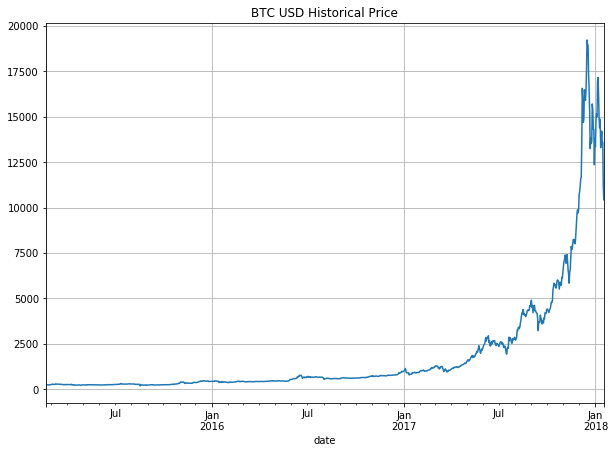

In [5]:
df.plot(figsize = (10,7), title = 'BTC USD Historical Price', grid = True)

In [6]:
df.pct_change().describe()

count    1067.000000
mean        0.004555
std         0.041314
min        -0.318834
25%        -0.010135
50%         0.003173
75%         0.020539
max         0.270148
Name: close, dtype: float64

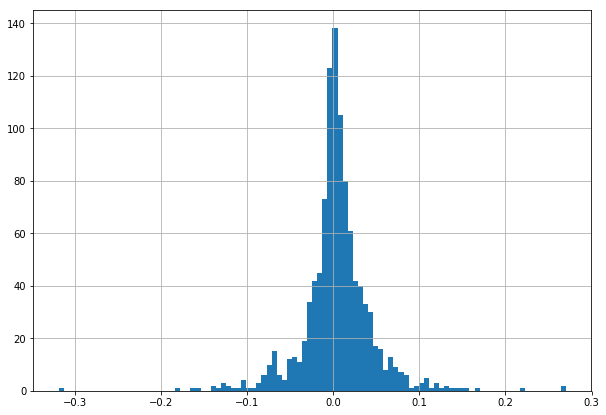

In [7]:
df.pct_change().hist(bins=100, figsize = (10, 7))

#Below shows the distribution of the daily percentage changes of BTC

In [8]:
def CryptoDataCSV(symbol, frequency):
    #Parameters: String symbol, int frequency = 300,900,1800,7200,14400,86400
    #Returns: df from first available date
    url ='https://poloniex.com/public?command=returnChartData&currencyPair='+symbol+'&end=9999999999&period='+str(frequency)+'&start=0'
    df = pd.read_json(url)
    df.set_index('date',inplace=True)
    df.to_csv(symbol + '.csv')
    print('Processed: ' + symbol)
    
#Use this method to extract data into a csv file so we can combine the data together

In [9]:
tickers =  ['USDT_BTC','USDT_ETC','USDT_XMR','USDT_ETH','USDT_DASH',
 'USDT_XRP','USDT_LTC']
    
for ticker in tickers:
    CryptoDataCSV(ticker, 86400)

Processed: USDT_BTC
Processed: USDT_ETC
Processed: USDT_XMR
Processed: USDT_ETH
Processed: USDT_DASH
Processed: USDT_XRP
Processed: USDT_LTC


In [10]:
crypto_df = pd.DataFrame()
for ticker in tickers:
    crypto_df[ticker] = pd.read_csv(ticker+'.csv', index_col = 'date')['close']
    
crypto_df.dropna(inplace=True)

crypto_df.head()

,USDT_BTC,USDT_ETC,USDT_XMR,USDT_ETH,USDT_DASH,USDT_XRP,USDT_LTC
date,,,,,,,
2016-07-28,656.341005,1.525000,1.850889,12.700000,9.260227,0.005860,3.957140
2016-07-29,657.990015,1.630042,1.912111,12.796413,9.500000,0.006200,4.097714
2016-07-30,656.420005,1.581557,1.920355,12.450000,9.239974,0.006200,4.062204
2016-07-31,624.844995,1.830000,1.820298,11.790000,9.481563,0.006000,3.955516
2016-08-01,610.049995,2.381024,1.713106,10.936247,10.249850,0.005742,3.892000


In [11]:
crypto_df.tail()

,USDT_BTC,USDT_ETC,USDT_XMR,USDT_ETH,USDT_DASH,USDT_XRP,USDT_LTC
date,,,,,,,
2018-01-17,11036.115325,28.900000,315.000000,1016.256673,790.335000,1.32000,186.397854
2018-01-18,11010.000090,29.743738,306.124808,995.999752,811.856565,1.54600,187.880000
2018-01-19,11410.539249,31.282632,361.498000,1025.000000,835.000000,1.52200,190.901039
2018-01-20,12750.174880,34.870000,383.990000,1148.476728,920.500000,1.56000,210.692728
2018-01-21,12520.437900,33.654080,376.399649,1125.000000,902.172423,1.52435,204.384245


In [12]:
crypto_df_norm = crypto_df.divide(crypto_df.iloc[0])

#To compare the relative performance of the coins, we divide the whole dataframe by the first row
#The subsequent data points represent each coins' respective percentage gain since July 29, 2017

In [19]:
crypto_df_norm.iplot(kind = 'scatter', xTitle = 'Date', yTitle = 'Percentage Change')

#Github does not render plotly graphs

Text(0,0.5,'Percent Change')

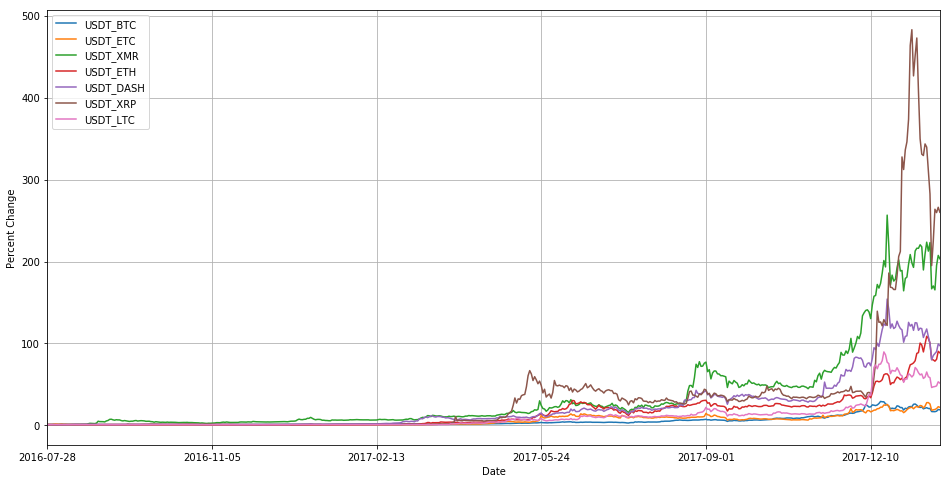

In [22]:
crypto_df_norm.plot(figsize = (16,8), grid = True)
plt.xlabel('Date')
plt.ylabel('Percent Change')

#Same visualization as above

In [11]:
crypto_df_pct = crypto_df.pct_change().dropna()
crypto_df_pct.describe()

,USDT_BTC,USDT_ETC,USDT_XMR,USDT_ETH,USDT_DASH,USDT_XRP,USDT_LTC
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000
mean,0.006159,0.008412,0.012941,0.010068,0.010413,0.015489,0.009687
std,0.045134,0.082433,0.088647,0.065213,0.069963,0.126947,0.077617
min,-0.182423,-0.293233,-0.252876,-0.235430,-0.202715,-0.493579,-0.272786
25%,-0.009160,-0.028460,-0.029393,-0.019834,-0.024304,-0.025115,-0.019541
50%,0.004038,-0.002022,0.002020,0.002847,0.002182,-0.002003,0.000076
75%,0.026535,0.036503,0.044219,0.029543,0.036911,0.028630,0.024891
max,0.268889,0.748120,0.808490,0.287554,0.443975,1.846396,0.823051


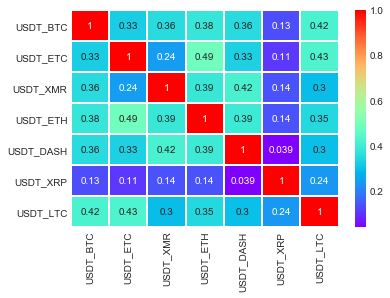

In [51]:
corr = crypto_df_pct.corr()
sns.heatmap(corr, cmap = 'rainbow', annot=True, linewidth = 1)

#Below is a heatmap of the correlation matrix of the cryptocurrencies

Ethereum (ETH) and Ethereum Classic (ETC) have the highest correlation of the currencies we are analyzing, which is understandable since the Ethereum platform forked into these two. Let's fit a linear regression model and do some statistical analysis to better understand the relationship of these two assets.

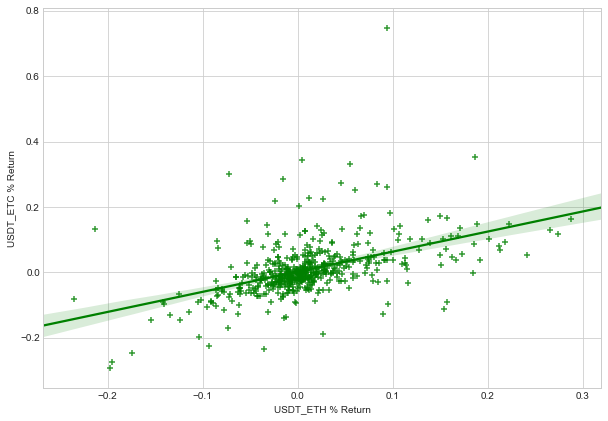

In [57]:
fig, ax = plt.subplots(figsize=(10,7))
regplot = sns.regplot(x='USDT_ETH', y='USDT_ETC', data=crypto_df_pct, color = 'g', marker = '+')
regplot.set(xlabel = 'USDT_ETH % Return', ylabel = 'USDT_ETC % Return')
sns.set_style("whitegrid")

In [16]:
import statsmodels.api as sm
model = sm.OLS(crypto_df_pct['USDT_ETH'],
               crypto_df_pct['USDT_ETC']).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               USDT_ETH   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     172.6
Date:                Tue, 16 Jan 2018   Prob (F-statistic):           2.23e-34
Time:                        20:15:12   Log-Likelihood:                 774.51
No. Observations:                 538   AIC:                            -1547.
Df Residuals:                     537   BIC:                            -1543.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
USDT_ETC       0.3927      0.030     13.136      0.000       0.334       0.451
==============================================================================
Omnibus:                       72.836   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.354
Skew:                           0.519   Prob(JB):                     2.46e-68
Kurtosis:                       6.579   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using the regression coefficient, the linear regression model would be: ETH_%_Return = ETC_%_Return * 0.3927

Another takeaway is the R-squared, which tells us how much the dependent varable's variance (ETH) is explained by the independent variable (ETC). This means that ETC's return on any given day explains 24.2% of ETH's variablility of returns.